In [1]:
import sympy
import concurrent.futures


def tCalculaPrimo(data):
    primos = 0
    for i in range(len(data)):
        if sympy.isprime(data[i]):
            primos += 1
    return primos

def resolve_trhread(data, ThreadsQtdd):
    tamanholista = len(data)
    index = range(0, tamanholista+(tamanholista//ThreadsQtdd), tamanholista//ThreadsQtdd)
    primos = 0
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = []
        for i in range(ThreadsQtdd):
            futures.append(executor.submit(tCalculaPrimo, data=data[index[i]:index[i+1]]))
        for future in concurrent.futures.as_completed(futures):
            #futures.append(future.result())
            primos += future.result()
    return primos

In [2]:
import sympy

def resolve_simples(data):
    tamanholista = len(data)
    primos = 0
    for i in range(tamanholista):
        if sympy.isprime(data[i]):
            primos += 1
    return primos

In [3]:
# importing pandas library  
import pandas as pd 

def tabela(df,threads, tempo_exc, primo_mt,speedup):
    #print(df)
    A=[threads, tempo_exc, primo_mt,speedup]
    #print(A)
    
    #s = pd.Series(A, index=df.columns)
    #df = df.append(s, ignore_index=True)
    
    df.loc[len(df)] = A

    #display(df)
    return(df)

1
2
3


Analise de 250000 valores




,Threads,Execucao,Numeros_Primos,SpeedUp
0,1.0,3930.8052,121299.0,1.029254
1,2.0,4218.9046,121299.0,0.938862
2,3.0,4247.8756,121298.0,0.943889
3,4.0,4212.6069,121299.0,0.965015
4,5.0,4221.1067,121299.0,0.934513
5,6.0,4243.3452,121295.0,0.942387
6,7.0,4166.6887,121297.0,0.973149
7,8.0,4176.8470,121299.0,0.959632
8,9.0,4202.2851,121292.0,0.943379
9,10.0,4181.1178,121299.0,0.949577


<AxesSubplot:xlabel='SpeedUp', ylabel='Threads'>

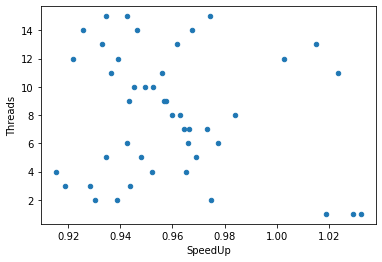

In [8]:
from time import perf_counter_ns
import pandas as pd 
import matplotlib.pyplot as plt
lista = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
i=0
df = pd.DataFrame(columns=['Threads','Execucao','Numeros_Primos', 'SpeedUp'])
with open("data.csv") as file:
    data = [line.strip() for line in file]
    
while i<=2:
    for x in lista:
        
        threads = x
        data = list(map(int, data))
    
        start1 = perf_counter_ns()
        primo_sp = resolve_simples(data)
        finish1 = perf_counter_ns()

        start2 = perf_counter_ns()
        primo_mt = resolve_trhread(data, threads)
        finish2 = perf_counter_ns()

        tempo_exc = (finish2-start2)/1000000
        speedup = (finish1-start1)/(finish2-start2)

        df_2 = tabela(df,threads, tempo_exc, primo_mt,speedup)
    i=i+1
    print(i)
    
print('\n\nAnalise de %d valores\n\n'%(len(data)))
display(df_2)

df_2.plot(x ='SpeedUp', y='Threads', kind = 'scatter')
